In [338]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [23]:
con = sqlite3.connect("./movies.db")

In [24]:
features = pd.read_sql("SELECT * FROM features", con, index_col='id')
features

,title,open,nation,producer,distributor,grade,genre,director,actors,accum_audience,accum_play,score
id,,,,,,,,,,,,
00000,국제시장,2014-12-17,한국,"(주)제이케이필름,씨제이이앤엠(주)",씨제이이앤엠(주),12세이상관람가,드라마,윤제균,"황정민,김윤진,오달수,정진영,장영남,라미란,김슬기,정영기,맹세창,김동원,김현중,김지...",6088876,121217,8.76
00001,테이큰 3,2015-01-01,미국,None,이십세기폭스코리아(주),15세이상관람가,"액션,범죄,스릴러",올리비에 메가턴,"리암 니슨,팜케 얀센,매기 그레이스,존 그리스,포레스트 휘테커",731242,20920,8.90
00002,마다가스카의 펭귄,2014-12-31,미국,None,씨제이이앤엠(주),전체관람가,"애니메이션,코미디,어드벤처,가족","에릭 다넬,사이몬 J.스미스","베네딕트 컴버배치,존 말코비치,톰 맥그라스,크리스 밀러,크리스토퍼 나이츠,켄 정",690824,16250,9.63
00003,"님아, 그 강을 건너지 마오",2014-11-27,한국,아거스필름,"CGV아트하우스,(주)대명문화공장",전체관람가,다큐멘터리,진모영,"조병만,강계열",353376,14924,9.80
00004,언브로큰,2015-01-07,미국,None,유니버설픽쳐스인터내셔널 코리아(유),15세이상관람가,"액션,드라마,전쟁",안젤리나 졸리,"잭 오코넬,도널 글리슨,가렛 헤드룬드,핀 위트록",256475,10780,9.66
00005,패딩턴,2015-01-07,영국,None,롯데쇼핑㈜롯데엔터테인먼트,전체관람가,"코미디,가족,어드벤처",폴 킹,"니콜 키드먼,벤 위쇼,휴 보네빌,샐리 호킨스",302759,9727,9.52
00006,기술자들,2014-12-24,한국,(주)트리니티엔터테인먼트,롯데쇼핑㈜롯데엔터테인먼트,15세이상관람가,"범죄,액션",김홍선,"김우빈,김영철,고창석,이현우,조윤희,임주환,조달환,권지훈,김원진,노선식,박갑진,유원...",227879,8068,8.84
00007,워킹걸,2015-01-07,한국,"(주)홍필름,(주)수필름",메가박스중앙(주)플러스엠,청소년관람불가,"코미디,멜로/로맨스",정범식,"조여정,클라라,김태우,배유람,정범식,정범식,박주희,백경인,조은영,손진우,배성우,유찬...",147328,7067,3.93
00008,호빗: 다섯 군대 전투,2014-12-17,미국,None,워너브러더스 코리아(주),12세이상관람가,"어드벤처,판타지",피터 잭슨,"마틴 프리먼,이안 맥켈런,리차드 아미티지,케이트 블란쳇,올랜도 블룸,크리스토퍼 리,...",81669,2597,9.61


In [25]:
the_witch = pd.read_sql("SELECT * FROM " + '"' + '10970' + '"', con, index_col='date')

# str -> float
# str -> datetime
the_witch['audience'] = pd.to_numeric(the_witch['audience'].str.replace(',',''), errors='coerce')
the_witch['play'] = pd.to_numeric(the_witch['play'].str.replace(',',''), errors='coerce')

the_witch.index = pd.to_datetime(the_witch.index)

the_witch

,audience,play
date,,
2018-04-24,624,1
2018-04-25,980042,11429
2018-04-26,595668,11629
2018-04-27,739908,12190
2018-04-28,1333307,13185
2018-04-29,1114946,12947
2018-04-30,495787,12257
2018-05-01,717324,10730
2018-05-02,276967,10389


In [27]:
open_the_witch = features.loc[10970]['open']

lookup = the_witch.index >= open_the_witch
the_witch = the_witch[lookup]
the_witch = the_witch

del the_witch['play']



TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [10970] of <class 'int'>

In [90]:
# the_witch -= the_witch.min()
# the_witch /= the_witch.max()

the_witch.to_csv('./the_witch.csv')

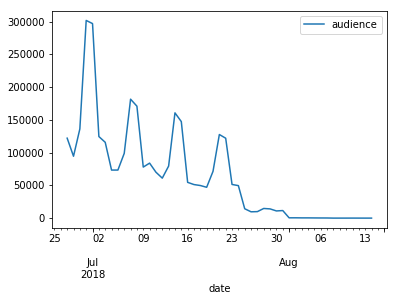

In [91]:
# the_witch['audience'].plot()
the_witch.plot()

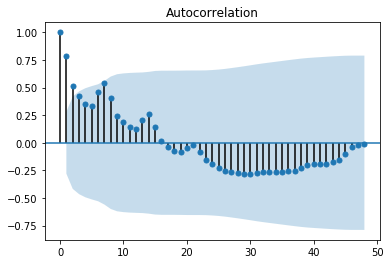

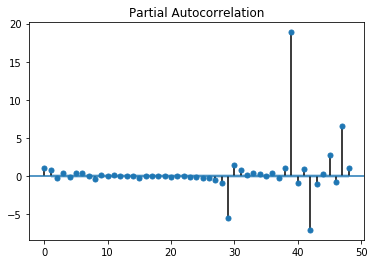

In [49]:
plot_acf(the_witch)
plot_pacf(the_witch)
plt.show()

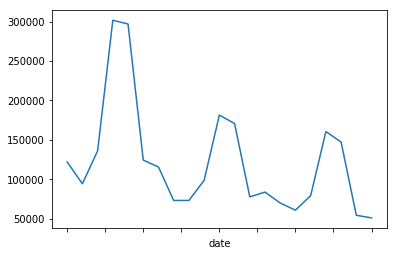

In [200]:
series = pd.read_csv('./the_witch.csv', header=0, index_col=0, squeeze=True)
series = series[:21]
series.plot()

C:\Users\Administrator\PycharmProjects\stock\env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


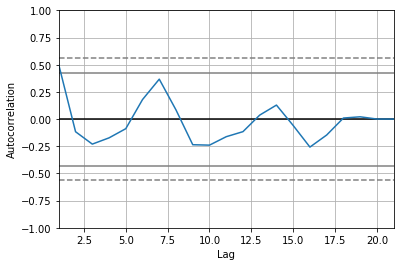

In [201]:
autocorrelation_plot(series)
plt.show()

In [103]:
model = ARIMA(series, order=(1,1,0), seasonal_order=(0,1,0,7))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

NameError: name 'series' is not defined

predicted=26327.866066, expected=51203.000000
predicted=64399.582487, expected=49738.000000
predicted=57871.825796, expected=47058.000000
predicted=82361.061500, expected=71362.000000
predicted=63406.268990, expected=127555.000000
predicted=107853.799297, expected=121909.000000
predicted=75944.513827, expected=51378.000000
predicted=22789.300208, expected=49582.000000
predicted=61722.746813, expected=14300.000000
predicted=11119.606042, expected=9648.000000
predicted=57918.988446, expected=9927.000000
predicted=5000.455077, expected=14724.000000
predicted=20010.163972, expected=14078.000000
predicted=1473.091321, expected=10961.000000
predicted=-905.650367, expected=11551.000000
predicted=385.693404, expected=457.000000
predicted=-11068.006009, expected=484.000000
predicted=-1944.709462, expected=375.000000
predicted=-9590.742091, expected=370.000000
predicted=-4771.408174, expected=289.000000
predicted=-9976.013237, expected=232.000000
predicted=-9576.126534, expected=197.000000
predi

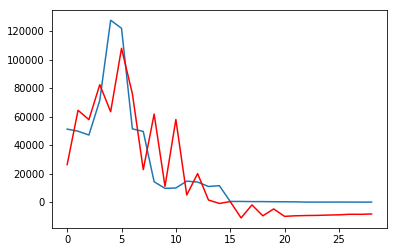

In [197]:
from sklearn.metrics import mean_squared_error

X = series.values
size = 20
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [343]:
import plotly.plotly as ply
import cufflinks as cf
from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
from pyramid.arima import auto_arima
from dateutil.parser import parse
import datetime

In [441]:
idx = '10970'
# idx = '11428'

sample = pd.read_sql("SELECT * FROM " + '"' + idx + '"', con, index_col='date')

sample['audience'] = pd.to_numeric(sample['audience'].str.replace(',',''), errors='coerce', downcast='float')
sample['play'] = pd.to_numeric(sample['play'].str.replace(',',''), errors='coerce', downcast='float')
sample.index = pd.to_datetime(sample.index)

open_sample = features.loc[idx]['open']

lookup = sample.index >= open_sample
sample = sample[lookup]

# str -> float
# str -> datetime

del sample['play']

open_date = parse(open_sample)

train_date = open_date + datetime.timedelta(days=22)
test_date = train_date + datetime.timedelta(days=1)
end_date = open_date + datetime.timedelta(days=39)
# datetime.datetime.strptime(open_sample, "%Y-%m-%d") 

In [231]:
# sample -= sample.min()
# sample /= sample.max()

In [442]:
data = sample[:end_date]
# data = sample[:'2018-08-01']

data.columns = ['Audience']

df
# data.iplot(title="1")

,riders
date,
2018-04-25,980042.0
2018-04-26,595668.0
2018-04-27,739908.0
2018-04-28,1333307.0
2018-04-29,1114946.0
2018-04-30,495787.0
2018-05-01,717324.0
2018-05-02,276967.0
2018-05-03,265430.0


In [354]:
train = data.loc[:train_date]
test = data.loc[test_date:]

# train = data.loc[:'2018-07-17']
# test = data.loc['2018-07-18':]

print(len(train))
len(test)

23


17

In [236]:
# result = seasonal_decompose(data, model='multiplicative')
# fig = result.plot()
# plot_mpl(fig)

In [355]:
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=858.727, BIC=866.056, Fit time=0.400 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=873.065, BIC=875.996, Fit time=0.013 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=859.739, BIC=865.602, Fit time=0.095 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=859.825, BIC=865.688, Fit time=0.321 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=867.546, BIC=873.409, Fit time=0.080 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=860.192, BIC=868.986, Fit time=0.642 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=858.230, BIC=864.093, Fit

In [289]:
# stepwise_model.fit(train)

ValueError: non-invertible starting MA parameters found with `enforce_invertibility` set to True.

In [414]:
mod = sm.tsa.statespace.SARIMAX(data, trend='c', order=(2,1,0), seasonal_order=(0,1,1,7))
results = mod.fit()
results.summary()

C:\Users\Administrator\PycharmProjects\stock\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                          Audience   No. Observations:                   40
Model:             SARIMAX(2, 1, 0)x(0, 1, 1, 7)   Log Likelihood                -424.011
Date:                           Sun, 02 Sep 2018   AIC                            858.021
Time:                                   20:51:16   BIC                            865.350
Sample:                               04-25-2018   HQIC                           860.451
                                    - 06-03-2018                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.503e+04   2.69e+04      0.929      0.353   -2.78e+04    7.78e+04
ar.L1         -0.1817      0.258     -0.703      0.482      -0.688       0.325
ar.L2         -0.1482      0.195     -0.760      0.447      -0.531       0.234
ma.S.L7       -0.3671      0.167     -2.200      0.028      -0.694      -0.040
sigma2      2.357e+10      0.081   2.93e+11      0.000    2.36e+10    2.36e+10
===================================================================================
Ljung-Box (Q):                       13.26   Jarque-Bera (JB):                41.12
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                            -1.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.18e+26. Standard errors may be unstable.
"""

In [418]:
future_forecast = results.predict(start=40, end=49, dynamic=True)
# future_forecast = results.predict(n_periods=17)
# future_forecast = results.forecast(steps=len(test))
print(future_forecast)
test
# len(future_forecast)

2018-06-04     16019.012712
2018-06-05     34779.291095
2018-06-06     44323.032468
2018-06-07     66947.194702
2018-06-08    105411.214430
2018-06-09    172215.285584
2018-06-10    193497.818547
2018-06-11    195470.423130
2018-06-12    233147.042445
2018-06-13    262330.796763
Freq: D, dtype: float64


,Audience
date,
2018-05-18,59412.0
2018-05-19,128719.0
2018-05-20,115791.0
2018-05-21,92626.0
2018-05-22,90877.0
2018-05-23,18213.0
2018-05-24,14346.0
2018-05-25,19045.0
2018-05-26,46992.0


In [419]:
# future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
df = pd.concat([test,future_forecast],axis=1)
df.iplot()
df

,Audience,0
2018-05-18,59412.0,NaN
2018-05-19,128719.0,NaN
2018-05-20,115791.0,NaN
2018-05-21,92626.0,NaN
2018-05-22,90877.0,NaN
2018-05-23,18213.0,NaN
2018-05-24,14346.0,NaN
2018-05-25,19045.0,NaN
2018-05-26,46992.0,NaN
2018-05-27,42144.0,NaN


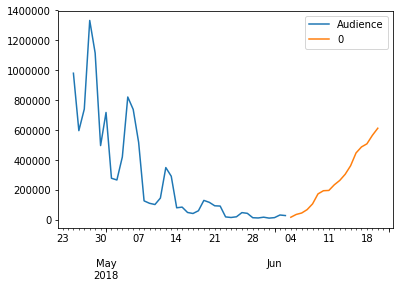

In [417]:
pd.concat([data,future_forecast],axis=1).plot()
df = pd.concat([test,future_forecast], axis=1)
# print((df.Audience - df.Prediction).sum())
# (df.Audience - df.Prediction).sum()/df.Audience.sum()

In [402]:
print(mean_absolute_error(test, future_forecast)/test.sum())
mean_squared_error(test, future_forecast)
# future_forecast

Audience    0.063881
dtype: float32


4619297897.093124

In [451]:
df = sample[:end_date]
df.columns = ['riders']

<Figure size 432x288 with 0 Axes>

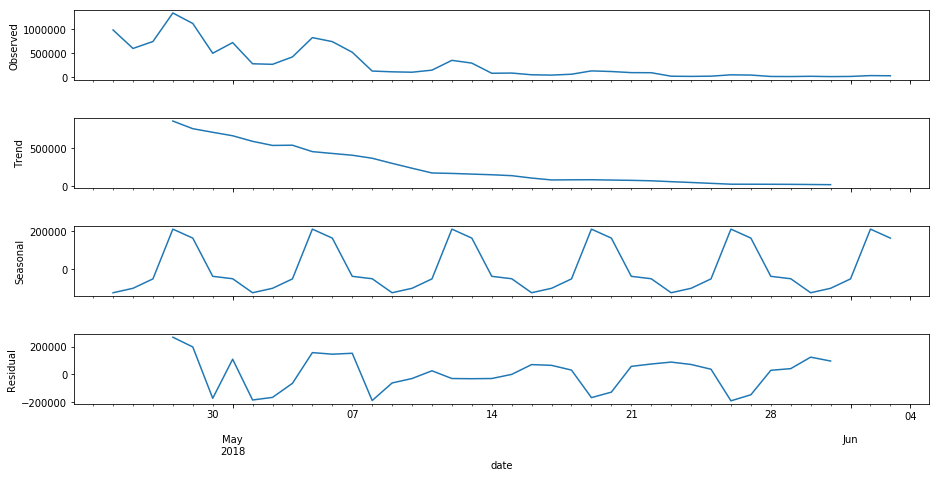

In [452]:
decomposition = seasonal_decompose(df.riders, freq=7)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [444]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=7)
    rolstd = pd.rolling_std(timeseries, window=7)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput) 

In [454]:
df['first_difference'] = df.riders - df.riders.shift(1)
df['seasonal_difference'] = df.riders - df.riders.shift(7)
df['seasonal_first_difference'] = df.first_difference - df.first_difference.shift(7)

df

C:\Users\Administrator\PycharmProjects\stock\env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Administrator\PycharmProjects\stock\env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Administrator\PycharmProjects\stock\env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,riders,first_difference,seasonal_difference,seasonal_first_difference
date,,,,
2018-04-25,980042.0,NaN,NaN,NaN
2018-04-26,595668.0,-384374.0,NaN,NaN
2018-04-27,739908.0,144240.0,NaN,NaN
2018-04-28,1333307.0,593399.0,NaN,NaN
2018-04-29,1114946.0,-218361.0,NaN,NaN
2018-04-30,495787.0,-619159.0,NaN,NaN
2018-05-01,717324.0,221537.0,NaN,NaN
2018-05-02,276967.0,-440357.0,-703075.0,NaN
2018-05-03,265430.0,-11537.0,-330238.0,372837.0


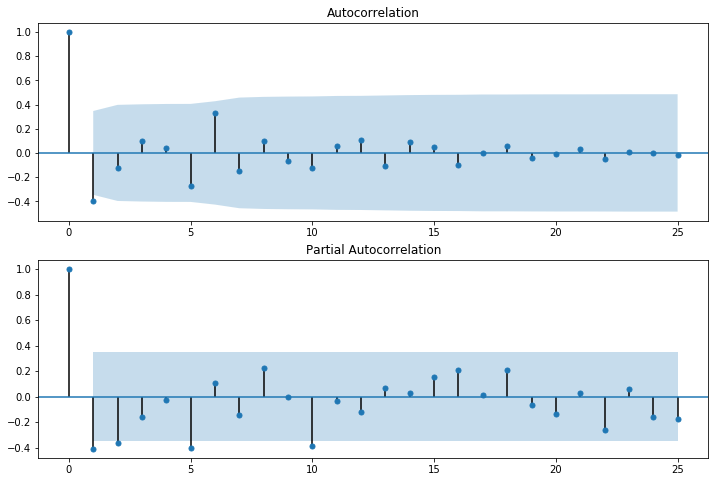

In [457]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.seasonal_first_difference.iloc[8:], lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.iloc[8:], lags=25, ax=ax2)

In [475]:
mod = sm.tsa.statespace.SARIMAX(df.riders, trend='n', order=(0,1,1), seasonal_order=(1,1,0,7))
results = mod.fit()
results.summary()

C:\Users\Administrator\PycharmProjects\stock\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                            riders   No. Observations:                   40
Model:             SARIMAX(0, 1, 1)x(1, 1, 0, 7)   Log Likelihood                -425.089
Date:                           Sun, 02 Sep 2018   AIC                            856.179
Time:                                   21:18:10   BIC                            860.576
Sample:                               04-25-2018   HQIC                           857.637
                                    - 06-03-2018                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2489      0.166     -1.496      0.135      -0.575       0.077
ar.S.L7       -0.2534      0.100     -2.531      0.011      -0.450      -0.057
sigma2      2.548e+10   3.57e-12   7.14e+21      0.000    2.55e+10    2.55e+10
===================================================================================
Ljung-Box (Q):                        8.81   Jarque-Bera (JB):                23.95
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.04   Skew:                            -1.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.33e+36. Standard errors may be unstable.
"""

C:\Users\Administrator\PycharmProjects\stock\env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



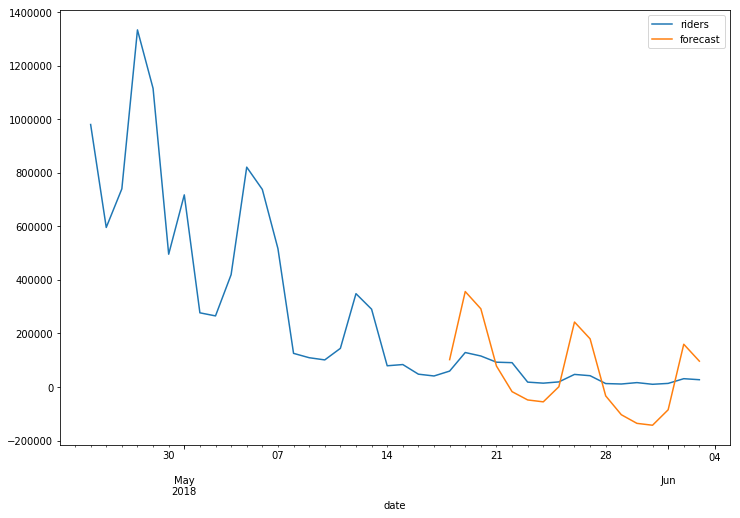

In [476]:
df['forecast'] = results.predict(start=23, end=39, dynamic= True)  
df[['riders', 'forecast']].plot(figsize=(12, 8))